# PROJECT: USED CAR MARKET
**GIẢNG VIÊN HƯỚNG DẪN: THẦY TRẦN TRUNG KIÊN**  

**THÔNG TIN NHÓM 1:**
1. DIỆP ĐẠI THIỆN NHÂN - 18120491
2. PHẠM MINH SỸ - 18120540

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Thu thập dữ liệu

- Tập dữ liệu mà nhóm lựa chọn là `used_car_sales`. Tập dữ liệu này thu thập thông tin về các loại xe qua sử dụng đã được bán. Nó bao gồm các thuộc tính name, year, selling_price, km_driven, fuel, seller_type, transmission, ower. Tập dữ liệu được thu thập từ trang `Kaggle` tại link sau [đây](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?fbclid=IwAR2RaMF8NWDYGPCl0sB9Y8HtpPx84xQDdDqlOPpypt0VzSNxRM_quWmlYGM) , license tại [đây](https://opendatacommons.org/licenses/dbcl/1-0/)
- Vì đây là dữ liệu trên `Kaggle` nên chúng ta chỉ cần đăng nhập là có thể lấy được dữ liệu này về một cách dễ dàng  

## Khám phá dữ liệu (đan xen tiền xử lý)

### Đọc dữ liệu 

In [2]:
df = pd.read_csv('used-car-sales.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
print(f"Kich thuoc cua du lieu: {df.shape}")

Kich thuoc cua du lieu: (4340, 8)


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau hay không?

Mỗi dòng cung cấp thông tin về  một loại xe đã qua sử dụng đã được bán đi, có vẻ như không có một dòng nào có ý nghĩa khác thường xuất hiện ở đây

### Dữ liệu có các dòng bị thiếu không?

In [4]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Dữ liệu không có dòng nào bị thiếu

### Dữ liệu có các dòng bị lặp không?

In [5]:
print(f"So dong bi lap: {df.duplicated().sum()}")

So dong bi lap: 763


## Tiền xử lý

### Loại bỏ dòng dữ liệu bị lặp

In [6]:
df = df.drop_duplicates()
print(f"Kich thuoc cua data sau khi loai bo cac dong bi lap: {df.shape}")

Kich thuoc cua data sau khi loai bo cac dong bi lap: (3577, 8)


## Khám phá dữ liệu (tiếp tục)

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của dữ liệu trên trang `Kaggle`
- name: Tên của chiếc xe
- year: Năm của chiếc xe khi được mua
- price: Giá của chiếc xe khi được bán lại (Đơn vị tính theo đô la)
- km_driven: Số km chiếc xe đã đi được
- fuel: Loại nhiên liệu chiếc xe sử dụng
    + Petrol
    + Diesel
    + CNG
    + LPG
    + Electric
- seller_type: Loại người bán
    + Individual
    + Dealer
    + Trustmark Dealer
- transmission: Hộ số truyền độ của động cơ
    + Manual
    + Automatic
- owner: Số đời chủ của loại xe khi được bán lại
    + First Owner
    + Second Owner
    + Third Owner
    + Fourth & Above Owner
    + Test Drive Car: Xe tập lái

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


Để biết được kiểu dữ liệu thật sự của các phần tử trong các cột `object`  này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh `type` để xem kiểu dữ liệu. Do đó tiền hành code hàm open_object_dtype trả về tập các kiểu dữ liệu có ở trong các cột

In [8]:
def open_object_dtype(s):
    dtypes = set(s.map(type))
    return dtypes

In [9]:
obj_cols = df.select_dtypes(["object"]).columns
data = obj_cols.map(lambda x: open_object_dtype(df[x]))
pd.Series(data=data, index = obj_cols)

name            {<class 'str'>}
fuel            {<class 'str'>}
seller_type     {<class 'str'>}
transmission    {<class 'str'>}
owner           {<class 'str'>}
dtype: object

### Với mỗi cột dữ liệu numeric, các giá trị được phân bố như thế nào?

Có tổng cột 3 cột có dữ liệu numeric, đó là `year`, `selling_price` và `km_driven`. 

Với mỗi cột numeric, ta sẽ tính tỉ lệ phần trăm giá trị bị thiếu (từ 0 đến 100), min và max. Kết quả được lưu vào dataframe `numeric_col_profiles_df`

In [10]:
pd.options.display.float_format = '{:,.0f}'.format
nume_cols = ["year", "selling_price", "km_driven"]

def missing_ratio(s):
    return s.isnull().mean() * 100

numeric_col_profiles_df = df[nume_cols].agg([missing_ratio, 'min', 'max'])
numeric_col_profiles_df

,year,selling_price,km_driven
missing_ratio,0,0,0
min,"1,992","20,000",1
max,"2,020","8,900,000","806,599"


Nhìn qua thì dữ liệu không có gì bất thường. Chúng ta sẽ thử tính toán và vẽ biểu đồ xem thử các giá trị này có thực sự bất thường hay không?

In [11]:
year_df = pd.DataFrame(df['year'].value_counts())
year_df.columns = ["Number of years"]


<BarContainer object of 27 artists>

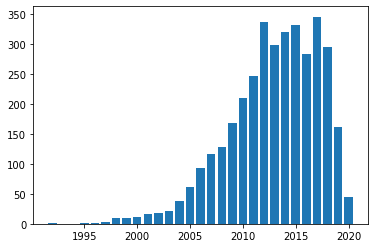

In [12]:
plt.bar(year_df.index, year_df['Number of years'])

Theo quan sát thì số lượng những chiếc xe cũ được bán rất ít và những chiếc xe có đời gần đây và không quá mới thì được ưu chuộng hơn

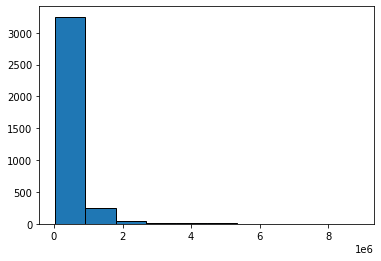

In [13]:
plt.hist(df['selling_price'], edgecolor='black');

In [14]:
len(df[df['selling_price'] > 3000000])

25

Theo quan sát, số lượng những chiếc xe đã qua sử dụng được bán lại có giá trị lớn hơn 3000000 đô la là rất ít. Ta cũng không thể khẳng định các giá trị này có phải là bất thường hay không, trên thực tế có những chiếc xe siêu đắt nên giá bán lại của chúng cũng không hề nhỏ là điều dễ hiểu. Do vậy, những giá trị này ta sẽ giữ lại và xem như chúng là những giá trị đặc biệt

<AxesSubplot:>

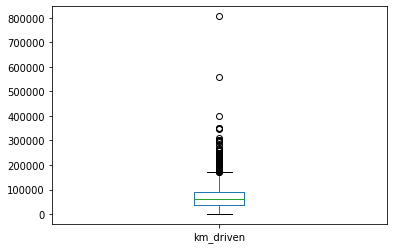

In [15]:
df.km_driven.plot.box()

In [16]:
len(df[df['km_driven'] > 350000])

3

Theo quan sát số lượng những chiếc xe được bán có số km đi được lớn hơn 350000 km cũng rất là nhỏ (3 giá trị) và để cho đơn giản cho quá trình phân tích,ta có thể coi như những giá trị ngoại lệ để loại bỏ

In [17]:
df = df[df.km_driven <= 350000]

## Tiền xử lý

### Với mỗi cột dữ liệu categorical, các giá trị được phân bố như thế nào?

In [18]:
cate_cols = ['fuel', 'seller_type', 'transmission', 'owner']
def num_diff_vals(series):
    return series.dropna().nunique()

def diff_vals(series):
    return series.dropna().unique()

cate_col_profiles_df = df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

cate_col_profiles_df

,fuel,seller_type,transmission,owner
missing_ratio,0,0,0,0
num_diff_vals,5,3,2,5
diff_vals,"[Petrol, Diesel, CNG, LPG, Electric]","[Individual, Dealer, Trustmark Dealer]","[Manual, Automatic]","[First Owner, Second Owner, Fourth & Above Own..."


### Loại bỏ các dòng có giá trị khoảng cách đi được ngoại lệ

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột dữ liệu categorical, các giá trị được phân bố như thế nào?

In [19]:
cate_cols = ['fuel', 'seller_type', 'transmission', 'owner']
def num_diff_vals(series):
    return series.dropna().nunique()

def diff_vals(series):
    return series.dropna().unique()

cate_col_profiles_df = df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

cate_col_profiles_df

,fuel,seller_type,transmission,owner
missing_ratio,0,0,0,0
num_diff_vals,5,3,2,5
diff_vals,"[Petrol, Diesel, CNG, LPG, Electric]","[Individual, Dealer, Trustmark Dealer]","[Manual, Automatic]","[First Owner, Second Owner, Fourth & Above Own..."


### Làm rõ hơn cột owner

In [20]:
df.owner.value_counts()

First Owner             2216
Second Owner             978
Third Owner              288
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

Theo mô tả thì cột owner thể hiện thông tin về số đời chủ của chiếc xe được bán. Trong các giá trị thì có giá trị `Test Drive Car` chưa thể hiện rõ thông tin này và số lượng cũng rất ít nên ta tiến hành loại bỏ

## Tiền xử lý

### Loại bỏ các dòng có giá cột `owner` là `Test Drive Car` 

In [21]:
df = df[df.owner != 'Test Drive Car']

## Đặt câu hỏi

Sau khi khám phá và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể trả lời được bằng dữ liệu:
- **Câu 1: Giá xe (`selling_price`) thay đổi như thế nào nếu khoảng cách đã đi (`km_driven`) thay đổi?**
    - Trả lời được câu hỏi này sẽ giúp cho người mua biết được khoảng cách đã đi chi phối như thế nào đến giá nhà, từ đó lựa chọn mua cho hợp lí, có thể chấp nhận được mức khoảng cách nào để tối thiểu được giá xe cũ
- **Câu 2: Giá xe trung bình của top 10 loại xe được bán nhiều nhất là bao nhiêu?**
    - Trả lời được câu hỏi này sẽ giúp cho người mua biết được giá xe trung bình của top các loại xe được bán nhiều nhất từ đó lựa chọn mua loại xe nào với mức giá hợp lý
- **Câu 3: Giá xe trung bình của top 5 các hãng xe được bán nhiều nhất theo số đời chủ là bao nhiêu?**
    - Trả lời được câu hỏi này sẽ giúp người mua biết được xu hướng thay đổi giá xe theo hãng xe và số đời chủ, từ đó người mua sẽ có định hướng nên mua hãng xe nào với số đời chủ là bao nhiêu để tối ưu giá


## Tiền xử lý

Trong các câu hỏi có nhắc đến hãng xe nên đầu tiên chúng ta thêm cột `brand` bằng các tách từ cột `name`, thể hiện thông tin hãng xe vào dữ liệu

In [22]:
df['brand'] = df.name.str.split(" ",expand=True)[0]
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,Maruti
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,Hyundai
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner,Tata
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner,Hyundai
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,Maruti


## Trả lời câu hỏi

### Câu 1: Giá xe  thay đổi như thế nào khi khoảng cách đi được thay đổi?

Để trả lời được câu hỏi này chúng ta cần thực hiện như sau:
- Tạo dataframe distance_price_df từ mhm_df với hai cột `selling_price` và `km_driven`
- Vì khoảng cách có tới 767 giá trị riêng biệt, do đó chúng ta tiến hành chia bin cho khoảng cách đi được, với độ rộng mỗi bin là 10000 (10000 là ngưỡng mà nhóm đặt ra, xem như là ngưỡng có thể chấp nhận được khi khoảng cách thay đổi), dùng hàm cut trong pandas để phân đoạn và xếp từng giá trị `selling_price` vào cột mới `bins`
- Tính trung bình giá xe theo từng `bins`
- Để vẽ được biểu đồ ta cần thêm cột `bins_average` là giá trị trung bình của biên trái và biên phải của mỗi bin, nhằm đại diện cho bin đó, vì cột `bins` hiện tại đang ở dạng categorical
- Vẽ biểu đồ đường để xem sự thay đổi của giá nhà khi khoảng cách thay đổi, trục hoành là giá trị trong `bins_average` đặt tên lại là `Distance`, trục tung là `Price`

- Code bước 1:

In [23]:
distance_price_df = df[['selling_price', 'km_driven']]
distance_price_df.head()

,selling_price,km_driven
0,60000,70000
1,135000,50000
2,600000,100000
3,250000,46000
4,450000,141000


- Code bước 2:

In [24]:
bins = np.arange(0, distance_price_df['km_driven'].max() + 10000, 10000)
bins

array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
       160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000,
       240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000,
       320000, 330000, 340000, 350000])

In [25]:
distance_price_df['bins'] = pd.cut(distance_price_df['km_driven'], bins)
distance_price_df.head()

,selling_price,km_driven,bins
0,60000,70000,"(60000, 70000]"
1,135000,50000,"(40000, 50000]"
2,600000,100000,"(90000, 100000]"
3,250000,46000,"(40000, 50000]"
4,450000,141000,"(140000, 150000]"


- Code bước 3:

In [26]:
distance_price_df = pd.DataFrame(distance_price_df.groupby(['bins'])['selling_price'].mean())
distance_price_df.head()

,selling_price
bins,
"(0, 10000]","800,645"
"(10000, 20000]","693,972"
"(20000, 30000]","607,080"
"(30000, 40000]","535,906"
"(40000, 50000]","489,647"


- Code bước 4:

In [27]:
pd.options.display.float_format = '{:,.2f}'.format
distance_price_df['bins_average'] = np.arange(5000, bins.max(), step=10000)
distance_price_df.head()

,selling_price,bins_average
bins,,
"(0, 10000]","800,644.79",5000
"(10000, 20000]","693,971.62",15000
"(20000, 30000]","607,080.47",25000
"(30000, 40000]","535,905.72",35000
"(40000, 50000]","489,646.51",45000


In [28]:
tmp = distance_price_df[['bins_average', 'selling_price']]
tmp = tmp.set_index('bins_average')
tmp.head(10)

,selling_price
bins_average,
5000,"800,644.79"
15000,"693,971.62"
25000,"607,080.47"
35000,"535,905.72"
45000,"489,646.51"
55000,"423,714.81"
65000,"407,702.90"
75000,"407,853.50"
85000,"341,048.60"


- Code bước 5:

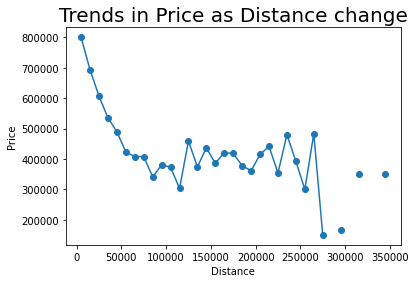

In [29]:
plt.plot(tmp, marker='o')
plt.title('Trends in Price as Distance change', size=20)
plt.xlabel('Distance')
plt.ylabel('Price');

Như vậy nhìn qua biểu đồ chúng ta có thể nhận thấy một xu hướng chung đó là khoảng cách đi được càng xa thì giá xe càng giảm, một số ngoại lệ thì có lẽ do nhiều yếu tố khác chi phối như chiếc xe đã giá đã rất cao từ ban đầu nên có bán lại thì giá vẫn còn cao hoặc có thể là những loại xe hiếm nên giá bán lại cũng rất cao. Biểu đồ sẽ tồn tại những điểm không có đoạn nối đó là do khi chia bin có một số khoảng cách không có

### Câu 2: Giá xe trung bình của top 10 loại xe được bán nhiều nhất là bao nhiêu?

Để trả lời câu hỏi này chúng ta cần thực hiện
- Tìm ra top 10 loại xe được bán nhiều nhất và lưu vào biến `top_10_selling_cars`
- Tính giá trị trung bình của các loại xe này
- Từ kết quả trên, vẽ biểu đồ dạng bar chart nằm ngang để biểu diễn

Code bước 1:

In [30]:
top_10_selling_cars = pd.DataFrame(df.name.value_counts()[:10])
top_10_selling_cars

,name
Maruti Swift Dzire VDI,54
Maruti Alto 800 LXI,48
Maruti Alto LXi,42
Maruti Alto LX,30
Hyundai EON Era Plus,28
Maruti Swift VDI BSIV,28
Maruti Wagon R VXI BS IV,26
Maruti Swift VDI,23
Maruti Wagon R LXI Minor,21
Hyundai Santro Xing GLS,20


Code bước 2:

In [31]:
mean_price_cars = pd.DataFrame(df[df.name.isin(top_10_selling_cars.index)].groupby('name')['selling_price'].mean())
mean_price_top_10_selling_cars = pd.DataFrame(top_10_selling_cars.join(mean_price_cars)['selling_price'])
mean_price_top_10_selling_cars.columns = ['Mean Price']
mean_price_top_10_selling_cars

,Mean Price
Maruti Swift Dzire VDI,"493,314.78"
Maruti Alto 800 LXI,"239,245.75"
Maruti Alto LXi,"124,714.26"
Maruti Alto LX,"115,133.27"
Hyundai EON Era Plus,"242,464.29"
Maruti Swift VDI BSIV,"447,071.39"
Maruti Wagon R VXI BS IV,"302,499.96"
Maruti Swift VDI,"381,434.78"
Maruti Wagon R LXI Minor,"142,428.57"
Hyundai Santro Xing GLS,"184,350.00"


Code bước 3:

Text(0.5, 1.0, 'Mean price of top 10 best selling used car')

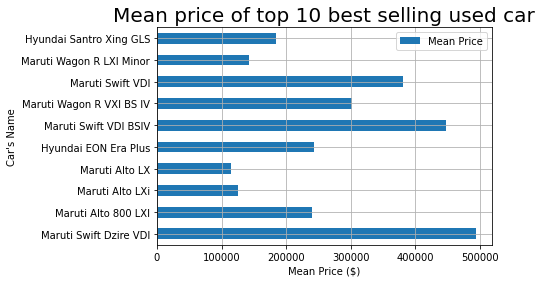

In [32]:
mean_price_top_10_selling_cars.plot(kind='barh')
plt.grid()
plt.xlabel('Mean Price ($)')
plt.ylabel("Car's Name")
plt.title("Mean price of top 10 best selling used car", size=20)

Nhìn chung thì top các loại xe được bán nhiều nhất đều có giá trên 100000 đô la.Chiếm phần lớn là các loại xe của hãng `Maruti` với chiếc `Maruti Swift Dizre VDI` có số lượng bán ra nhiều nhất và giá cũng cao nhất. 1 vị trí nằm trong top 10 khác thuộc về hãng `Hyundai` với giá cũng gần 250000 đô la

## Giá xe trung bình của top 5 các hãng xe được bán nhiều nhất theo số đời chủ là bao nhiêu?

Để trả lời được câu hỏi này, chúng ta cần thực hiện
- Tìm ra top 5 hãng xe có số lượng xe được bán nhiều nhất lưu vào biến
- Tính giá xe trung bình theo số đời chủ của các loại xe thuộc 5 hãng vừa tìm được
- Từ kết quả trên, vẽ biểu đồ `barh` với trục x là giá xe trung bình, trục y là số đời chủ xe

Code bước 1

In [33]:
top_brand = pd.DataFrame(df.brand.value_counts()[:5])
top_brand

,brand
Maruti,1070
Hyundai,637
Mahindra,328
Tata,308
Honda,214


Code bước 2

In [34]:
top_brand_by_owner = df[df.brand.isin(top_brand.index)].groupby(['owner','brand'])['selling_price'].mean()
top_brand_by_owner = top_brand_by_owner.unstack().dropna()
top_brand_by_owner

brand,Honda,Hyundai,Mahindra,Maruti,Tata
owner,,,,,
First Owner,"615,791.10","485,797.03","689,182.72","404,848.96","354,853.90"
Fourth & Above Owner,"310,000.00","152,749.92","298,571.29","145,176.47","123,333.33"
Second Owner,"334,555.47","322,219.46","465,106.34","230,018.12","191,168.37"
Third Owner,"210,300.00","190,961.46","340,966.53","210,047.58","129,865.90"


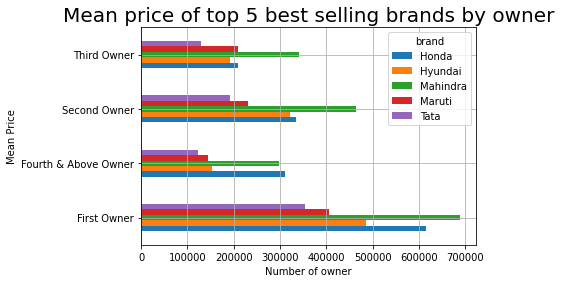

In [35]:
top_brand_by_owner.plot(kind='barh')
plt.xlabel('Number of owner')
plt.ylabel('Mean Price')
plt.grid()
plt.title('Mean price of top 5 best selling brands by owner', fontsize=20);

Đối với xe chỉ qua 1 đời chủ nhân là hãng `Ford` có giá trung bình cao nhất mặc dù số lượng xe hãng `Ford` bán ra chỉ đứng thứ 5 và chỉ thấp hơn 1 chút là hãng `Marutin`. Các đời khác thì giá xe của hãng `Marutin` là hãng có số lượng xe bán được nhiều nhất luôn có giá trị trung bình cao nhất

In [10]:
pd.options.display.float_format = '{:,.0f}'.format
nume_cols = ["year", "selling_price", "km_driven"]

def missing_ratio(s):
    return s.isnull().mean() * 100

numeric_col_profiles_df = df[nume_cols].agg([missing_ratio, 'min', 'max'])
numeric_col_profiles_df

,year,selling_price,km_driven
missing_ratio,0,0,0
min,"1,992","20,000",1
max,"2,020","8,900,000","806,599"


Nhìn qua thì dữ liệu không có gì bất thường. Chúng ta sẽ thử tính toán và vẽ biểu đồ xem thử các giá trị này có thực sự bất thường hay không?

In [11]:
year_df = pd.DataFrame(df['year'].value_counts())
year_df.columns = ["Number of years"]
year_df.sort_index()

,Number of years
1992,1
1995,1
1996,2
1997,3
1998,9
1999,9
2000,12
2001,16
2002,18
2003,22


<BarContainer object of 27 artists>

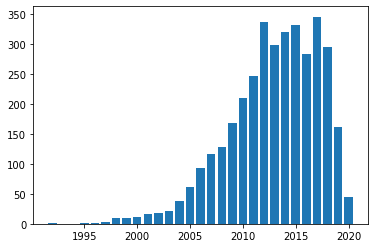

In [12]:
plt.bar(year_df.index, year_df['Number of years'])

Theo quan sát thì số lượng những chiếc xe cũ được bán rất ít và những chiếc xe có đời gần đây và không quá mới thì được ưu chuộng hơn

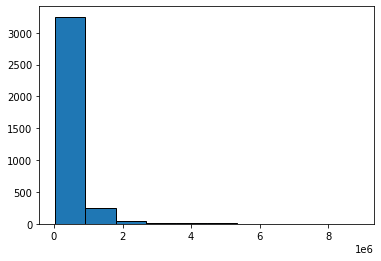

In [13]:
plt.hist(df['selling_price'], edgecolor='black');

In [14]:
len(df[df['selling_price'] > 3000000])

25

Theo quan sát, số lượng những chiếc xe đã qua sử dụng được bán lại có giá trị lớn hơn 3000000 đô la là rất ít. Ta cũng không thể khẳng định các giá trị này có phải là bất thường hay không, trên thực tế có những chiếc xe siêu đắt nên giá bán lại của chúng cũng không hề nhỏ là điều dễ hiểu. Do vậy, những giá trị này ta sẽ giữ lại và xem như chúng là những giá trị đặc biệt

<AxesSubplot:>

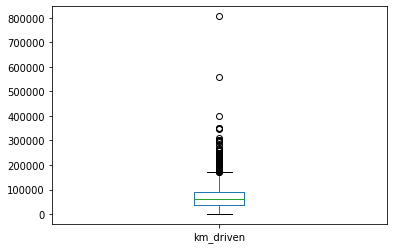

In [15]:
df.km_driven.plot.box()

In [16]:
len(df[df['km_driven'] > 350000])

3

Theo quan sát số lượng những chiếc xe được bán có số km đi được lớn hơn 350000 km cũng rất là nhỏ (3 giá trị) và để cho đơn giản cho quá trình phân tích,ta có thể coi như những giá trị ngoại lệ để loại bỏ

### Với mỗi cột dữ liệu categorical, các giá trị được phân bố như thế nào?

In [17]:
cate_cols = ['fuel', 'seller_type', 'transmission', 'owner']
def num_diff_vals(series):
    return series.dropna().nunique()

def diff_vals(series):
    return series.dropna().unique()

cate_col_profiles_df = df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

cate_col_profiles_df

,fuel,seller_type,transmission,owner
missing_ratio,0,0,0,0
num_diff_vals,5,3,2,5
diff_vals,"[Petrol, Diesel, CNG, LPG, Electric]","[Individual, Dealer, Trustmark Dealer]","[Manual, Automatic]","[First Owner, Second Owner, Fourth & Above Own..."


## Tiền xử lý

### Loại bỏ các dòng có giá trị khoảng cách đi được ngoại lệ

In [18]:
df = df[df.km_driven <= 350000]

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột dữ liệu categorical, các giá trị được phân bố như thế nào?

In [19]:
cate_cols = ['fuel', 'seller_type', 'transmission', 'owner']
def num_diff_vals(series):
    return series.dropna().nunique()

def diff_vals(series):
    return series.dropna().unique()

cate_col_profiles_df = df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

cate_col_profiles_df

,fuel,seller_type,transmission,owner
missing_ratio,0,0,0,0
num_diff_vals,5,3,2,5
diff_vals,"[Petrol, Diesel, CNG, LPG, Electric]","[Individual, Dealer, Trustmark Dealer]","[Manual, Automatic]","[First Owner, Second Owner, Fourth & Above Own..."


## Đặt câu hỏi

Sau khi khám phá và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể trả lời được bằng dữ liệu:
- **Câu 1: Giá xe (`selling_price`) thay đổi như thế nào nếu khoảng cách đã đi (`km_driven`) thay đổi?**
    - Trả lời được câu hỏi này sẽ giúp cho người mua biết được khoảng cách đã đi chi phối như thế nào đến giá nhà, từ đó lựa chọn mua cho hợp lí, có thể chấp nhận được mức khoảng cách nào để tối thiểu được giá xe cũ

## Tiền xử lý

Đầu tiên thêm cột `brand`, thể hiện thông tin hãng xe vào dữ liệu

In [20]:
df['brand'] = df.name.str.split(" ",expand=True)[0]

In [21]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,Maruti
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,Hyundai
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner,Tata
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner,Hyundai
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,Maruti


In [22]:
df.brand.value_counts()

Maruti           1070
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            169
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Ambassador          3
Jeep                3
OpelCorsa           2
MG                  2
Daewoo              1
Isuzu               1
Kia                 1
Force               1
Name: brand, dtype: int64

## Trả lời câu hỏi

### Câu 1: Giá xe  thay đổi như thế nào khi khoảng cách đi được thay đổi?

Để trả lời được câu hỏi này chúng ta cần thực hiện như sau:
- Tạo dataframe distance_price_df từ mhm_df với hai cột `selling_price` và `km_driven`
- Vì khoảng cách có tới 767 giá trị riêng biệt, do đó chúng ta tiến hành chia bin cho khoảng cách đi được, với độ rộng mỗi bin là 10000 (10000 là ngưỡng mà nhóm đặt ra, xem như là ngưỡng có thể chấp nhận được khi khoảng cách thay đổi), dùng hàm cut trong pandas để phân đoạn và xếp từng giá trị `selling_price` vào cột mới `bins`
- Tính trung bình giá xe theo từng `bins`
- Để vẽ được biểu đồ ta cần thêm cột `bins_average` là giá trị trung bình của biên trái và biên phải của mỗi bin, nhằm đại diện cho bin đó, vì cột `bins` hiện tại đang ở dạng categorical
- Vẽ biểu đồ đường để xem sự thay đổi của giá nhà khi khoảng cách thay đổi, trục hoành là giá trị trong `bins_average` đặt tên lại là `Distance`, trục tung là `Price`

- Code bước 1:

In [23]:
distance_price_df = df[['selling_price', 'km_driven']]
distance_price_df.head()

,selling_price,km_driven
0,60000,70000
1,135000,50000
2,600000,100000
3,250000,46000
4,450000,141000


- Code bước 2:

In [24]:
bins = np.arange(0, distance_price_df['km_driven'].max() + 10000, 10000)
bins

array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
       160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000,
       240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000,
       320000, 330000, 340000, 350000])

In [25]:
distance_price_df['bins'] = pd.cut(distance_price_df['km_driven'], bins)
distance_price_df.head()

,selling_price,km_driven,bins
0,60000,70000,"(60000, 70000]"
1,135000,50000,"(40000, 50000]"
2,600000,100000,"(90000, 100000]"
3,250000,46000,"(40000, 50000]"
4,450000,141000,"(140000, 150000]"


- Code bước 3:

In [26]:
distance_price_df = pd.DataFrame(distance_price_df.groupby(['bins'])['selling_price'].mean())
distance_price_df.head()

,selling_price
bins,
"(0, 10000]","812,086"
"(10000, 20000]","696,671"
"(20000, 30000]","607,381"
"(30000, 40000]","535,906"
"(40000, 50000]","489,647"


- Code bước 4:

In [27]:
pd.options.display.float_format = '{:,.2f}'.format
distance_price_df['bins_average'] = np.arange(5000, bins.max(), step=10000)
distance_price_df.head()

,selling_price,bins_average
bins,,
"(0, 10000]","812,086.26",5000
"(10000, 20000]","696,670.64",15000
"(20000, 30000]","607,381.18",25000
"(30000, 40000]","535,905.72",35000
"(40000, 50000]","489,646.51",45000


In [28]:
tmp = distance_price_df[['bins_average', 'selling_price']]
tmp = tmp.set_index('bins_average')
tmp.head(10)

,selling_price
bins_average,
5000,"812,086.26"
15000,"696,670.64"
25000,"607,381.18"
35000,"535,905.72"
45000,"489,646.51"
55000,"423,714.81"
65000,"407,702.90"
75000,"407,853.50"
85000,"341,048.60"


- Code bước 5:

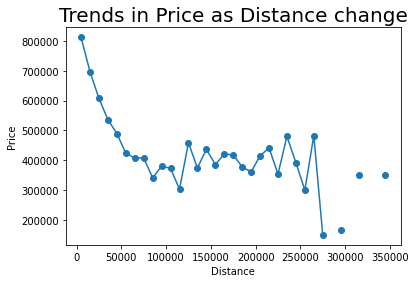

In [29]:
plt.plot(tmp, marker='o')
plt.title('Trends in Price as Distance change', size=20)
plt.xlabel('Distance')
plt.ylabel('Price');

Như vậy nhìn qua biểu đồ chúng ta có thể nhận thấy một xu hướng chung đó là khoảng cách đi được càng xa thì giá xe càng giảm, một số ngoại lệ thì có lẽ do nhiều yếu tố khác chi phối như chiếc xe đã giá đã rất cao từ ban đầu nên có bán lại thì giá vẫn còn cao hoặc có thể là những loại xe hiếm nên giá bán lại cũng rất cao. Biểu đồ sẽ tồn tại những điểm không có đoạn nối đó là do khi chia bin có một số khoảng cách không có